In [5]:
!ls  ./Downloads/Week-3-UNIX/unix

shakespeare.txt


In [6]:
filename = './Downloads/Week-3-UNIX/unix/shakespeare.txt'
!echo $filename
print(filename)

./Downloads/Week-3-UNIX/unix/shakespeare.txt
./Downloads/Week-3-UNIX/unix/shakespeare.txt


'echo' means to show the value of the filename

$ is used for UNIX commands (so not needed for python commands)

In [7]:
!head -n 3 $filename

'head' command prints the 'n' amount of lines in a file

In [8]:
!tail -n 10 $filename

'tail' command prints the last 'n' amount of lines in a file

In [9]:
!wc $filename

 124505  901447 5583442 ./Downloads/Week-3-UNIX/unix/shakespeare.txt


lines   words    characters

!wc -l $filename --> prints # of lines

In [11]:
! grep -i 'parchment' $filename

prints lines with 'someword'

In [13]:
# finds the amount of lines with the word 'liberty'
!cat $filename | grep -o 'liberty' | wc -l

71


In [15]:
#replace all instances of 'parchment' to 'REPLACED'
!sed -e 's/parchment/REPLACED/g' $filename > temp.txt 

In [16]:
!grep -i 'REPLACED' temp.txt

In [18]:
#sorted in alphabetical order
!head -n 5 $filename | sort

In [19]:
#columns separated by ' ', sort on column 2 (-k2), case insensitive (-f)
!head -n 5 $filename | sort -f -t' ' -k2

In [20]:
#uniq lines in text
!sort $filename | uniq -u | wc -l

110834


In [23]:
#count most frequent words in shakespeare.txt 
!sed -e 's/\s/\n/g' < $filename | sort | uniq -c | sort -nr | head -15

 641573 
  23244 the
  19542 I
  18302 and
  15623 to
  15551 of
  12532 a
  10824 my
   9576 in
   9081 you
   7851 is
   7531 that
   7068 And
   6948 not
   6722 with
sort: write failed: 'standard output': Broken pipe
sort: write error


# Plot by importing word counts into Python

In [24]:
%matplotlib inline

In [28]:
!ls edX4DS/MyDir

all-fruits.txt	fruits-sorted.txt  fruits-unique.txt  word-counts.png
count_vs_words	fruits.txt	   shakespeare.txt


<function matplotlib.pyplot.show(*args, **kw)>

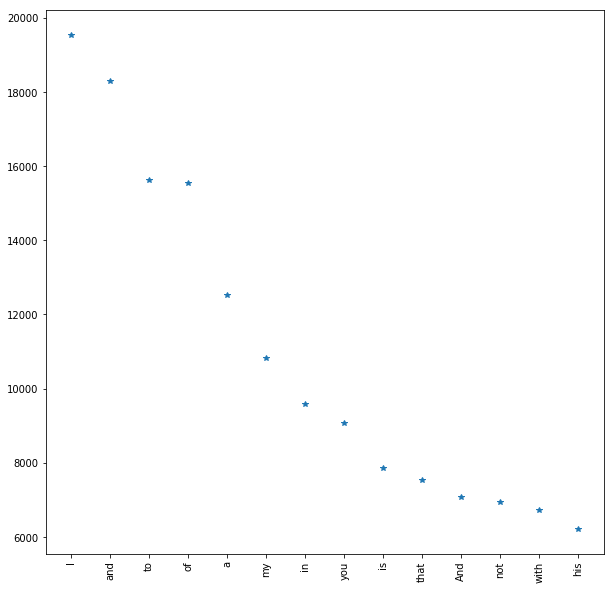

In [29]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('./edX4DS/MyDir/count_vs_words', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))
        
#removing count of spaces
y = y[1:]
xTicks = xTicks[1:]
#plotting graph
x = range(len(y))
plt.figure(figsize=(10,10))
plt.xticks(x,xTicks,rotation = 90)
plt.plot(x,y,'*')
plt.show